# Image Classification with Deep Learning  
## A Practical Introduction Using the Fashion-MNIST Dataset

## 1. Introduction

Image classification is a core problem in computer vision and a foundational application of deep learning. The task involves assigning a predefined label to an image based on its visual content. Unlike traditional machine learning approaches that rely on handcrafted features, deep learning models particularly Convolutional Neural Networks (CNNs) automatically learn hierarchical representations directly from raw image data. This ability makes CNNs especially effective for visual recognition tasks.

The Fashion-MNIST dataset is used as the experimental benchmark. Fashion-MNIST consists of grayscale images of clothing items and serves as a more realistic alternative to the classic handwritten digit MNIST dataset. While the images are relatively small (28×28 pixels), the dataset captures real-world challenges such as inter-class similarity and ambiguous visual patterns, making it well-suited for learning and evaluating convolutional neural networks.

## 2. Project Objectives

The primary objectives of this project are to:

- Understand the image classification problem from a deep learning perspective  
- Explore and preprocess image data for use in convolutional neural networks  
- Design and implement a CNN using TensorFlow and Keras  
- Train the model using appropriate optimization and regularization techniques  
- Evaluate model performance using accuracy and class-wise metrics  
- Analyze model strengths, weaknesses, and common sources of misclassification  

By the end of this project, a complete and reproducible image classification pipeline will be developed.

## 3. Tools and Technologies

The project is implemented using the following tools and libraries:

- **Python** for data processing and model development  
- **TensorFlow / Keras** for building and training deep learning models  
- **NumPy** for numerical operations  
- **Matplotlib and Plotly** for data visualization  
- **Scikit-learn** for evaluation metrics  

## 4. Project Structure

The project is organized into clearly defined phases, covering:

1. Dataset exploration and visualization  
2. Data preprocessing and normalization  
3. Convolutional neural network design  
4. Model training and regularization  
5. Performance evaluation and error analysis  
6. Model improvement and discussion of results  

Each phase builds on the previous one, ensuring a structured and incremental learning experience.

---



# Phase 1: Dataset Exploration and Visualization

In [4]:
# Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras



In [5]:
# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
# Inspecting dataset shapes
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [12]:
# Define class names for better readability
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot""T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [10]:
# Have a look at pixel value distribution
print("Minimum pixel: ", X_train.min())
print("Maximum pixel: ", X_train.max())


Minimum pixel:  0
Maximum pixel:  255


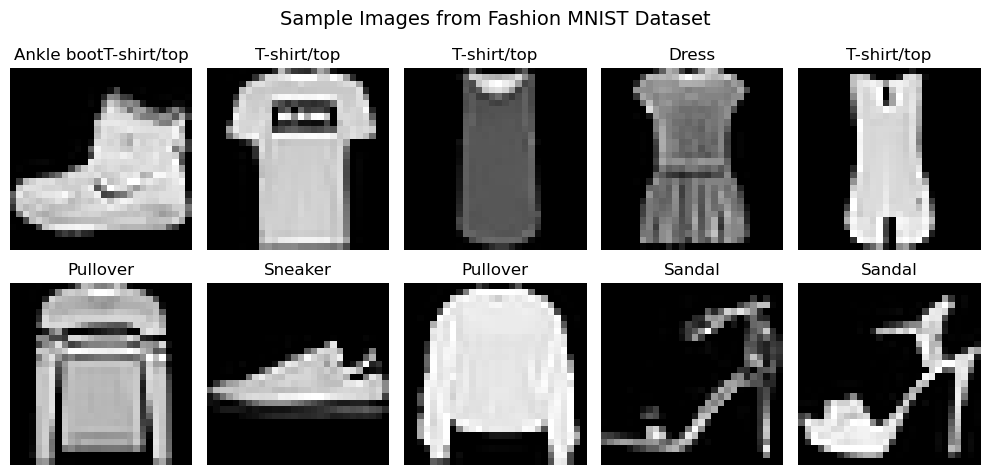

In [13]:
# Visualize sample images
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')

plt.suptitle("Sample Images from Fashion MNIST Dataset", fontsize= 14)
plt.tight_layout()
plt.show()

**What is observed**
1. Some classes are visually distinct (Sneaker, Ankle boot)
2. Others overlap heavily (Shirt vs T-shirt vs Pullover)
3. This visual ambiguity explains future classification errors

In [16]:
# Class distribution check
unique, counts = np.unique(y_train, return_counts=True)

for label, count in zip(unique, counts):
    print(f"Class {class_names[label]}: {count} images")

Class T-shirt/top: 6000 images
Class Trouser: 6000 images
Class Pullover: 6000 images
Class Dress: 6000 images
Class Coat: 6000 images
Class Sandal: 6000 images
Class Shirt: 6000 images
Class Sneaker: 6000 images
Class Bag: 6000 images
Class Ankle bootT-shirt/top: 6000 images


No class imbalance bias